# **Tarea 1 Diseño y Análisis de Algoritmos**

## Integrantes:
1. Sofía Bobadilla
2. Cristóbal Mesías

# Introducción

En la presente tarea se busca realizar una comparación entre distintos algoritmos de búsqueda de patrones en texto. En un principio, las métricas a comparar son las de tiempo de ejecución y cantidad de comparaciones realizadas para encontrar la solución. Los algoritmos a comparar son *Knuth Morris Pratt* y *Boyer Moore Horspool*, los que se detallarán en seguida.

## Algoritmo Knuth Morris Pratt (KMP)

En este algoritmo se utiliza la función *f* o *de fracaso* descrita a continuación con el fin de aprovechar el arreglo precalculado por *f* y recorrer el arreglo de manera mas eficiente. Cada paso podrá o no tener un salto en el recorrido en función del resultado de *f*, viendolo como un puntero en cada paso se avanza al menos un índice o en lo que indica la función de fracaso, esto dependiendo de las condiciones en el comparador.


Complejidad:
- Peor caso: $O(mn)$*

Pero si analizamos en profundidad dicho costo, se tiene que $\Theta(n)$ es el peor caso para la búsqueda y calcular la función *f* es $\Theta(m)$, por lo tanto el orden de complejidad del peor caso del algoritmo es realmente $\Theta(m+n)$





Sobre la **función de fracaso del patrón** *f*:
Siendo *i* un índice dentro de un arreglo la función ***f(i)*** se refiere al mayor prefijo de una cadena *x* tal que es sufijo de la misma, para ejemplificar se muestran dos ejemplos:

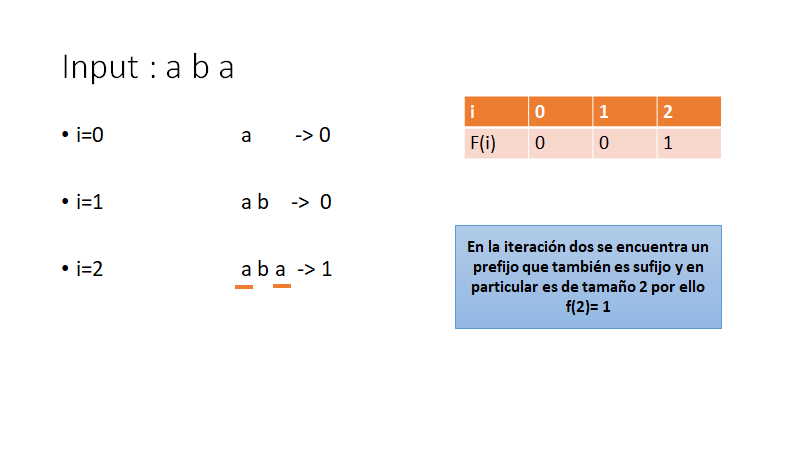

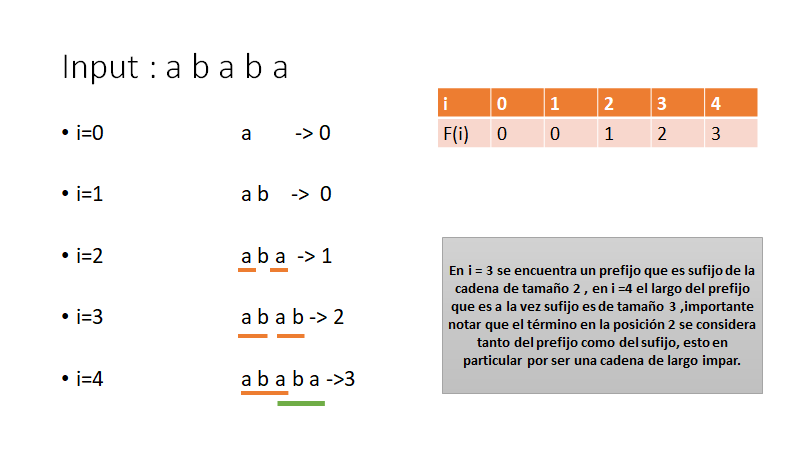


## Uso de la función de fracaso *f*
El algoritmo aprovecha la función *f* generando saltos con el valor que indica esta, así evita comparar todo el patrón, por ejemplo, si en algún momento la función *f* retorna un valor *x*, el patron se comienza a comparar desde la posición patron[x] en adelante, asegurando de que la parte de la cadena previa (o prefijo) a esa posición está emparejada con el texto y lo que es relevante saber es el resultado de las comparaciones desde esa posición en adelante.


### Implementación algoritmo KMP de búsqueda de texto


In [ ]:
def kmp(pat, txt):
    n_comp = 0
    M = len(pat)
    N = len(txt)
    pat = pat.lower()
    txt = txt.lower()
    
    # create lps[] that will hold the longest prefix suffix
    # values for pattern
    lps = [0] * M
    j = 0  # index for pat[]

    # Preprocess the pattern (calculate lps[] array)
    computeLPSArray(pat, M, lps)

    # empty list
    v = []
    i = 0  # index for txt[]
    while i < N:
        if pat[j] == txt[i]:
            i += 1
            j += 1
            n_comp += 1

        if j == M:
            v.append(i - j)
            j = lps[j - 1]


        # mismatch after j matches
        elif i < N and pat[j] != txt[i]:
            n_comp += 1
            # Do not match lps[0..lps[j-1]] characters,
            # they will match anyway
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    print(f'# comparisons = {n_comp}')
    return v


def computeLPSArray(pat, M, lps):
    len = 0  # length of the previous longest prefix suffix

    lps[0]  # lps[0] is always 0
    i = 1

    # the loop calculates lps[i] for i = 1 to M-1
    while i < M:
        if pat[i] == pat[len]:
            len += 1
            lps[i] = len
            i += 1
        else:
            # This is tricky. Consider the example.
            # AAACAAAA and i = 7. The idea is similar
            # to search step.
            if len != 0:
                len = lps[len - 1]

                # Also, note that we do not increment i here
            else:
                lps[i] = 0
                i += 1

#### Fuente: https://www.geeksforgeeks.org/kmp-algorithm-for-pattern-searching/

In [ ]:
print(kmp('aabaaa','aaaabaabaaabb'))

print(kmp('c','aaaaa'))

print(kmp('nto', 'Cada vez que pienso en ti, mis ojos rompen en llanto, y muy triste me pregunto, ¿por qué te quiero tanto?'))

# comparisons = 17
[5]
# comparisons = 5
[]
# comparisons = 109
[49, 75, 101]


## Algortimo Boyer Moore Horspool (BMH)

Este algoritmo fue presentado por **Horspool** quien propuso utilizar solamente el salto del mal carácter para calcular los saltos en el algoritmo de Boyer-Moore, generando así una simplificación del anterior.


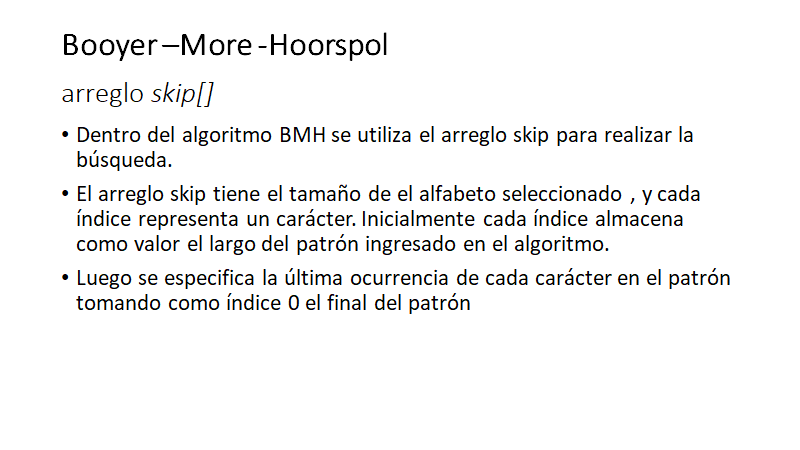

El arreglo *skip* es un arreglo del tamaño del patrón, donde cada letra del patrón se utiliza como *key* y su *value* es el valor inicial del largo del patrón, para posteriormente ser reemplazada por *largo del patrón - indice* de la última ocurrencia de la *key*, tal como se muestra a continuación.

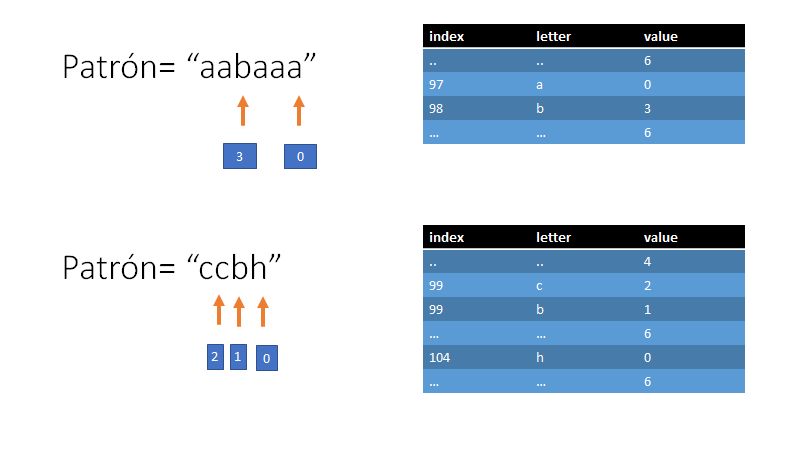

Ahora, se puede ver un ejemplo de uso de arreglo *skip* junto con el algoritmo *BMH*

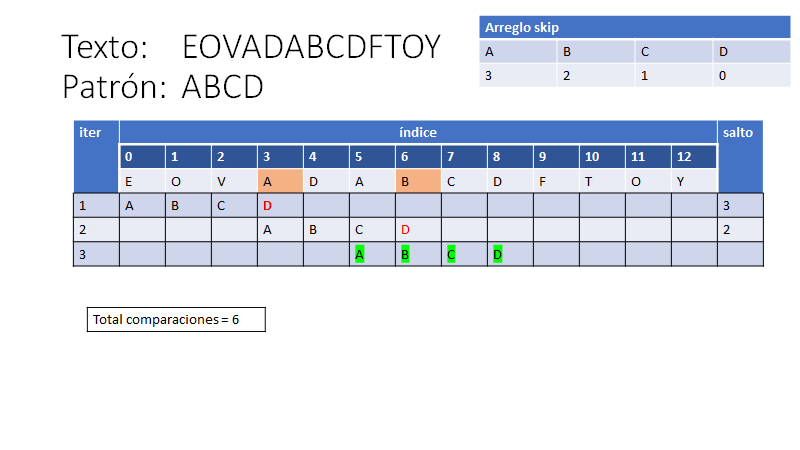

Como se ve en el ejemplo, el patrón se posiciona inicialmente a la misma altura del texto, luego en función de las comparaciones fallidas avanza según lo que indique para el caracter fallido el arreglo skip, si es un caracter que no forma parte del patrón el salto es del largo del patrón, sino, es la posición en la que se encuentra la última aparición del caracter en el patrón.

Complejidad:
- Peor caso $O(mn)$
- Promedio $O(n)$
- Mejor caso sublineal

### Implementación algoritmo BMH de búsqueda de texto

In [1]:
from collections import defaultdict

def bmh(pattern, text):
    m = len(pattern)
    n = len(text)
    pattern = pattern.lower()
    text = text.lower()

    if m > n:
        return -1

    skip = defaultdict(lambda: m)
    results = []

    for k in range(m - 1):
        skip[ord(pattern[k])] = m - k - 1

    k = m - 1
    n_comp = 0

    while k < n:
        j = m - 1
        i = k
        len_results = len(results)
        while j >= 0 and text[i] == pattern[j]:
            j -= 1
            i -= 1
            n_comp += 1
        if j == -1:
            results.append(i + 1)

        if len_results - len(results) == 0: # No contar dos veces la misma letra!
            n_comp += 1

        k += skip[ord(text[k])]

    print(f'# comparisons = {n_comp}')
    return results


#### Fuente: https://github.com/jwasham/code-catalog-python/blob/master/catalog/suggested/pattern_matching/boyer-moore-horspool.py

In [2]:
print(bmh('aabaaa','aaaabaabaaabb'))

print(bmh('c','aaaaa'))

print(bmh('nto', 'Cada vez que pienso en ti, mis ojos rompen en llanto, y muy triste me pregunto, ¿por qué te quiero tanto?'))

# comparisons = 13
[5]
# comparisons = 5
[]
# comparisons = 45
[49, 75, 101]


## Experimentación

Se presenta una serie de experimentos, con 4 textos escogidos de forma no aleatoria :
 

1.   Trabalenguas 
2.   Ensayo
3.   Genoma de 1000 caracteres
4.   Genoma de 10000 caracteres
Los primeros dos son escogidos para realizar búsquedas complejas en las que el algoritmo BM rinda mejor , probandolo en un texto con muchos patrones similares pero no del estilo palíndromos y en uno que pertenece a un texto literario conocido por no presentar patrones específicos.
No así los *Experimentos 3 y 4*, donde se espera que el rendimiento mejore para KMP ya que corresponde a una larga cadena de caracteres limitados con muchas combinaciones , aca si se tendran patrones tipo palíndromo que se espera facilite la búsqueda para KMP.  

### Experimento 1
Texto de prueba: Trabalengua clásico \\
Patrón: 'pod' \\
Comportamiento esperado: debería funcionar mejor BMH


In [ ]:
import time

print("Experimento N°1 \n")
print("Algoritmo KMP")

start = time.perf_counter()
print(kmp('pod', 'Podador que podas la parra, ¿qué parra podas? ¿Podas mi parra o tu parra podas? Ni podo tu parra ni mi parra podo, que podo la parra de mi tío Bartolo'))
elapsed_time = time.perf_counter() - start
elapsed_time = round(elapsed_time, 5)
print(f'tiempo = {elapsed_time} ms')

print("\n################################## \n")

print("Algoritmo BMH")
start = time.perf_counter()
print(bmh('pod', 'Podador que podas la parra, ¿qué parra podas? ¿Podas mi parra o tu parra podas? Ni podo tu parra ni mi parra podo, que podo la parra de mi tío Bartolo'))
elapsed_time = time.perf_counter() - start
elapsed_time = round(elapsed_time, 5)
print(f'tiempo = {elapsed_time} ms')

Experimento N°1 

Algoritmo KMP
# comparisons = 157
[0, 12, 39, 47, 73, 83, 109, 119]
tiempo = 0.00064 ms

################################## 

Algoritmo BMH
# comparisons = 70
[0, 12, 39, 47, 73, 83, 109, 119]
tiempo = 0.00028 ms


### Experimento 2
Texto de prueba: Ensayo de Gabriela Mistral , "Menos condor mas Huemul" \\
Patrón: 'El huemul quiere decir la sensibilidad de una raza' \\
Comportamiento esperado: BMH debería arrojar mejor resultado

In [ ]:
#EJECUTAR ESTE CÓDIGO PARA DESCARGAR ARCHIVO DEL EXPERIMENTO
!wget https://raw.githubusercontent.com/cmesiasd/t1-cc4102/master/data/menos_condor_mas_huemul.txt

In [ ]:
import time

exp2 = "menos_condor_mas_huemul.txt"
file_exp2 = open(exp2, "r")

content_exp2 = file_exp2.read()
print("Experimento N°2 \n")
print("Algoritmo KMP")
start = time.perf_counter()
print(kmp('El huemul quiere decir la sensibilidad de una raza', content_exp2))
elapsed_time = time.perf_counter() - start
elapsed_time = round(elapsed_time, 5)
print(f'tiempo = {elapsed_time} ms')

print("\n################################## \n")

print("Algoritmo BMH")
start = time.perf_counter()
print(bmh('El huemul quiere decir la sensibilidad de una raza', content_exp2))
elapsed_time = time.perf_counter() - start
elapsed_time = round(elapsed_time, 5)
print(f'tiempo = {elapsed_time} ms')



Experimento N°2 

Algoritmo KMP
# comparisons = 5008
[2201]
tiempo = 0.0019 ms

################################## 

Algoritmo BMH
# comparisons = 290
[2201]
tiempo = 0.00033 ms


### Experimento 3
Texto de prueba: Genoma de una bacteria(1000 lineas) \\
Patrón: 'TTTTTT' \\
Comportamiento esperado: KMP debería funcionar mejor
**Fuente de datos**:  [Cronobacter sakazakii strain ATCC 29544, complete genome](https://www.ebi.ac.uk/ena/browser/view/CP011047)

In [ ]:
#EJECUTAR ESTE CÓDIGO PARA DESCARGAR ARCHIVO DEL EXPERIMENTO
!wget https://raw.githubusercontent.com/cmesiasd/t1-cc4102/master/data/genoma1000.txt

In [ ]:
exp3 = "genoma1000.txt"
file3 = open(exp3, "r")
processed_string = ""
for line in file3:
  stripped_line = line.rstrip()
  processed_string += stripped_line
file3.close()
import time

print("Experimento N°3 \n")
print("Algoritmo KMP")

start = time.perf_counter()
print(kmp('TTTTTT', processed_string))
elapsed_time = time.perf_counter() - start
elapsed_time = round(elapsed_time, 5)
print(f'tiempo = {elapsed_time} ms')

print("\n################################## \n")

print("Algoritmo BMH")

start = time.perf_counter()
print(bmh('TTTTTT', processed_string))
elapsed_time = time.perf_counter() - start
elapsed_time = round(elapsed_time, 5)
print(f'tiempo = {elapsed_time} ms')

Experimento N°3 

Algoritmo KMP
# comparisons = 73989
[692, 5513, 5514, 11386, 12082, 14412, 14521, 16132, 20700, 21339, 25518, 25519, 25552, 26765, 30819, 31519, 37242, 37589, 38239, 45736, 47749, 55192, 57634, 57904]
tiempo = 0.02701 ms

################################## 

Algoritmo BMH
# comparisons = 17591
[692, 5513, 5514, 11386, 12082, 14412, 14521, 16132, 20700, 21339, 25518, 25519, 25552, 26765, 30819, 31519, 37242, 37589, 38239, 45736, 47749, 55192, 57634, 57904]
tiempo = 0.01057 ms


### Experimento 4
Texto de prueba: Genoma de una bacteria (100000 lineas) \\
Patrón: 'TTTTTT' \\
Comportamiento esperado: KMP debería funcionar mejor

In [ ]:
#EJECUTAR ESTE CÓDIGO PARA DESCARGAR ARCHIVO DEL EXPERIMENTO
!wget https://raw.githubusercontent.com/cmesiasd/t1-cc4102/master/data/genoma100000.txt

--2021-04-02 22:37:15--  https://raw.githubusercontent.com/cmesiasd/t1-cc4102/master/data/genoma100000.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4586452 (4.4M) [text/plain]
Saving to: ‘genoma100000.txt.1’

genoma100000.txt.1  100%[===================>]   4.37M  11.9MB/s    in 0.4s    

2021-04-02 22:37:16 (11.9 MB/s) - ‘genoma100000.txt.1’ saved [4586452/4586452]



In [ ]:
exp4 = "genoma100000.txt"
file4 = open(exp4, "r")
processed_string = ""
for line in file4:
  stripped_line = line.rstrip()
  processed_string += stripped_line
file4.close()

In [ ]:
import time


print("Experimento N°4 \n")
print("Algoritmo KMP")

start = time.perf_counter()
print(kmp('TTTTTT', processed_string))
elapsed_time = time.perf_counter() - start
elapsed_time = round(elapsed_time, 5)
print(f'tiempo = {elapsed_time} ms')

print("\n################################## \n")

print("Algoritmo BMH")

start = time.perf_counter()
print(bmh('TTTTTT', processed_string))
elapsed_time = time.perf_counter() - start
elapsed_time = round(elapsed_time, 5)
print(f'tiempo = {elapsed_time} ms')

Experimento N°4 

Algoritmo KMP
# comparisons = 5485387
[692, 5513, 5514, 11386, 12082, 14412, 14521, 16132, 20700, 21339, 25518, 25519, 25552, 26765, 30819, 31519, 37242, 37589, 38239, 45736, 47749, 55192, 57634, 57904, 60440, 60441, 62136, 62137, 62138, 62251, 62618, 68174, 69284, 72920, 75663, 75893, 77274, 79268, 79442, 87024, 87105, 87666, 89188, 89189, 94747, 94748, 98665, 99030, 101971, 107863, 109122, 110742, 116366, 118342, 118343, 120545, 120546, 121519, 123836, 124464, 127645, 129864, 133003, 134789, 135455, 139922, 139923, 139946, 140908, 142179, 142299, 145331, 146159, 154388, 154403, 155174, 155175, 155176, 155448, 156546, 157981, 158380, 159004, 159634, 159758, 159759, 160013, 160332, 160333, 160334, 160836, 160837, 160838, 160952, 160953, 161755, 161756, 163161, 163547, 164204, 164585, 165146, 165147, 165365, 165911, 166669, 167749, 170454, 170906, 171007, 173008, 177470, 181848, 186988, 190966, 191186, 192103, 198829, 198830, 198831, 198832, 199872, 200433, 200906, 200

### Resultados

Cantidad de comparaciones

| Experimento\Algoritmo 	| KMP     	| BMH     	|
|:-----------------------:|:---------:|:---------:|
| 1                     	| 157     	| 70      	|
| 2                     	| 5008    	| 290     	|
| 3                     	| 73989   	| 17591   	|
| 4                     	| 5485397 	| 1284531 	|


Tiempo de ejecución*

| Experimento\Algoritmo 	|      KMP     	|      BMH     	|
|:---------------------:	|:------------:	|:------------:	|
|           1           	| 0.00064 [ms] 	| 0.00028 [ms] 	|
|           2           	|  0.0019 [ms] 	|  0.0003 [ms] 	|
|           3           	| 0.02701 [ms] 	| 0.01057 [ms] 	|
|           4           	| 1.93982 [ms] 	| 0.67581 [ms] 	|

*El tiempo de ejecución puede variar dependiendo de factores de computo al momento de realizar la experimentación.



Se presentó como hipótesis al inicio de la experimentación que los Experimentos 1 y 2 mostraran mejores resultados para el algoritmo BM y a su vez que KMP funcionara mejor en los experimentos 3 y 4.

En cuanto a las comparaciones en todos los experimentos el algoritmo BMH realizo una cantidad considerablemente menor que KMP, esto se infiere que se debe principalmente a la eficiencia de BMH al momento de recorrer el texto entregado. A pesar de esto KMP si se comporto como se esperaba comparando sus propios resultados en los experimentos.

Sobre los tiempos de ejecución no hay mucho mas que añadir, el comportamiento es similar que en las comparaciones y algo a destacar es que a pesar de que un método es mas eficiente que otro para textos de menor tamaño (< 100.000 carácteres) ambos presentaran un rendimiento apropiado. Además, se debe considerar que dentro del tiempo de ejecución va incluído todo el preprocesamiento de los inputs, para ambos algoritmos.
